In [1]:
% pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Attribute Information:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Univariate Analysis

## Continuous Data

### Data Describe 

In [4]:
train_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000,13035.000000
mean,6518.000000,2.214806,0.336786,5.548293,11.550288,0.027388,3.002762,0.683698,1.425853,0.482389,0.463317,0.623282,0.196035,32.527733,135.249405,167.777138
std,3763.024714,1.052064,0.472629,3.297280,6.912504,0.163217,2.006777,0.465050,0.647530,0.191656,0.171546,0.199746,0.124183,46.655799,131.879162,160.786886
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3259.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.460000,0.104500,3.000000,30.000000,35.000000
50%,6518.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.480000,0.469700,0.620000,0.194000,14.000000,103.000000,124.000000
75%,9776.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.790000,0.283600,42.000000,194.000000,246.000000
max,13035.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,1.000000,1.000000,0.850700,367.000000,796.000000,957.000000


### Histogram

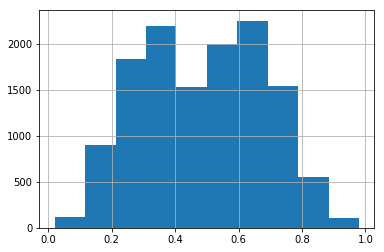

In [5]:
train_data['temp'].hist(bins = 10)

More bikes are rented when the temperature is average. Most people won't rent a bike when it is too hot or too cold

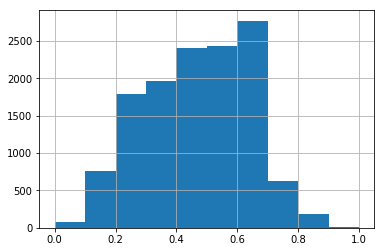

In [6]:
train_data['atemp'].hist(bins = 10)

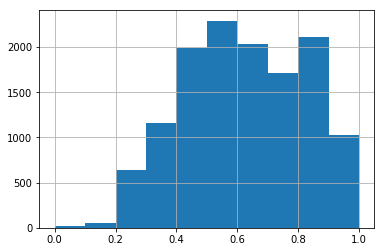

In [7]:
train_data['hum'].hist(bins = 10)

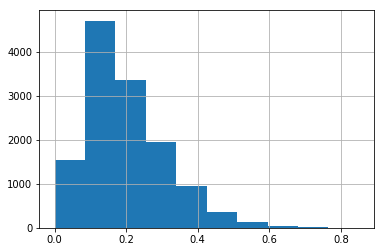

In [8]:
train_data['windspeed'].hist(bins = 10)

### Categorical Variable

In [9]:
train_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
train_data['season'].value_counts()

2    4409
1    3980
3    2512
4    2134
Name: season, dtype: int64

Season 1 and 2 have twice the number of instances of Bike Sharing than season 3 and 4. This intuitively makes sense as season 1 & 2 are spring and summer which would be pleasant and season 3 & 4 would be fall & winter which will be cold.

In [11]:
print (train_data['hr'].unique())
print (train_data['hr'].value_counts())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
16    548
17    548
7     547
14    547
13    547
12    547
15    547
23    546
11    546
8     546
9     546
10    546
18    546
19    546
20    546
21    546
22    546
6     545
0     545
1     544
5     537
2     535
3     520
4     518
Name: hr, dtype: int64


In [12]:
train_data[['hr', 'cnt']][:50]

,hr,cnt
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1
5,5,1
6,6,2
7,7,3
8,8,8
9,9,14


In [13]:
print (train_data['workingday'].unique())
print (train_data['workingday'].value_counts())

[0 1]
1    8912
0    4123
Name: workingday, dtype: int64


In [14]:
print (train_data['holiday'].unique())
print (train_data['holiday'].value_counts())

[0 1]
0    12678
1      357
Name: holiday, dtype: int64


# Bivariate Analysis

## Continuous & Continuous

### Scatter Plot

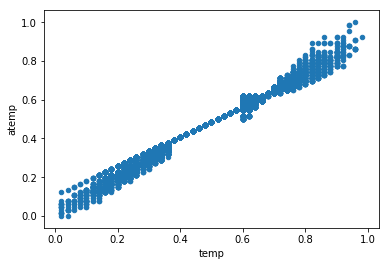

In [15]:
train_data.plot.scatter('temp', 'atemp')

temp and atemp have a positive linear relation.

Correlation - gives an idea about a linear relationship between 2 continuous variables

In [16]:
train_data.temp.corr(train_data.atemp)

0.9918673349213911

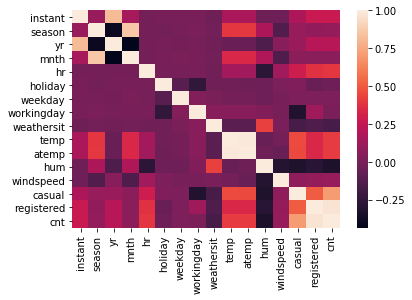

In [17]:
import seaborn as sns
corr = train_data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

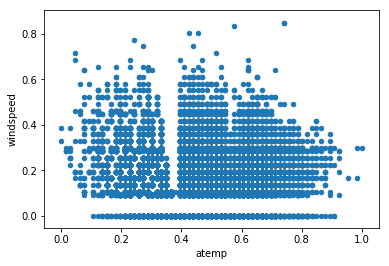

In [18]:
train_data.plot.scatter('atemp', 'windspeed')

## Categorical & Continuous

### Boxplots of Continuous Variable over the categories of Categorical Variable

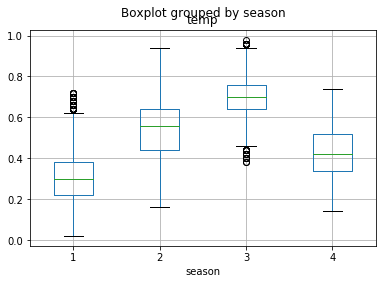

In [19]:
train_data.boxplot(column = 'temp', by = 'season')

season 2 and 3 are favourable

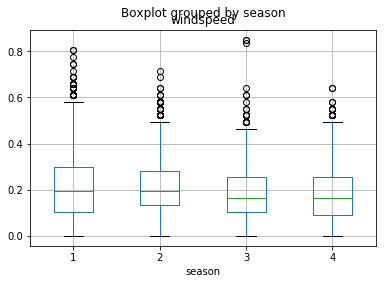

In [20]:
train_data.boxplot(column = 'windspeed', by = 'season')

## Categorical & Categorical

### Pivot Tables

In [21]:
#print (train_data.head())
print (train_data.pivot_table(values = 'cnt', index = 'hr', columns = 'workingday', aggfunc = 'mean'))

workingday           0           1
hr                                
0            79.732558   32.461126
1            60.482558   15.051075
2            47.429412    8.005479
3            23.441176    4.525714
4             7.213018    4.707736
5             7.597561   20.726542
6            16.923977   89.077540
7            38.445087  252.385027
8            92.427746  418.442359
9           149.878613  214.691689
10          226.815029  118.420912
11          279.647399  138.198391
12          326.450867  174.377005
13          334.815029  173.582888
14          329.265896  159.735294
15          326.664740  173.136364
16          322.017341  252.352000
17          296.069364  461.733333
18          260.744186  434.860963
19          214.959302  307.251337
20          161.081395  220.505348
21          129.313953  166.556150
22          106.267442  123.604278
23           77.825581   77.278075


### Stacked Bar Chart

In [22]:
temp = train_data.pivot_table(values = 'cnt', index = 'hr', columns = 'workingday', aggfunc = 'mean')

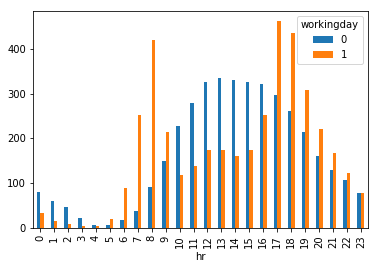

In [23]:
temp.plot(kind = 'bar')

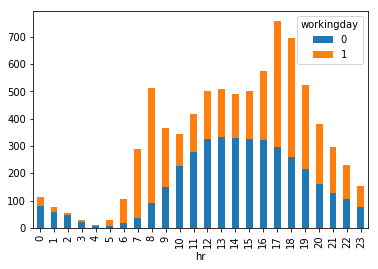

In [24]:
temp.plot(kind = 'bar', stacked = True)

Shows us hourly distribution of count of rented bikes. 
In the hours 0-6, when people will be sleeping, we have low amount of rented bikes. Around 7th to 9th hour and 17th to 19th hour, we see a hike in the number of biked rented. this would be the hours when people go and come back from work on a working day.

In [25]:
train_data.groupby(['season']).cnt.mean()

season
1    113.251256
2    208.344069
3    195.664411
4    152.828960
Name: cnt, dtype: float64